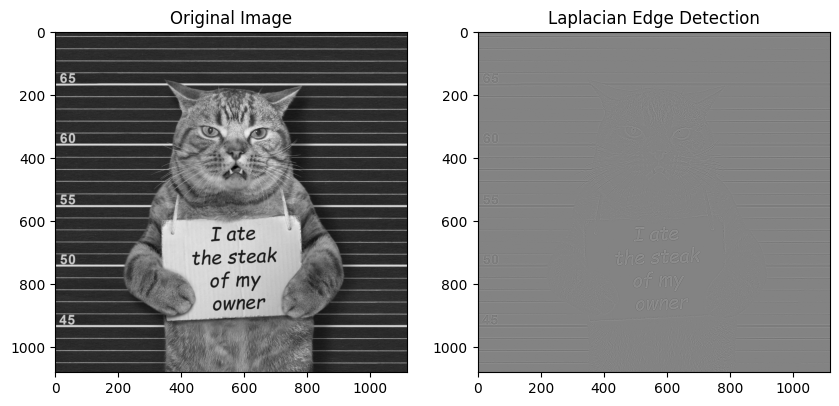

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\cat.jpg', cv2.IMREAD_GRAYSCALE)

# 應用拉普拉斯運算子
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# 顯示原圖和拉普拉斯邊緣檢測結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.imshow(laplacian, cmap='gray')

plt.show()


Histogram values: [     1      1      1      3      3      1      3      7      3      5
      6      9      9     18     15     19     35     44    100    192
    385    972   1193   1093   1192   1582   1488   1538   1577   1549
   1687   2102   1905   2002   1947   2242   2272   2815   2824   3350
   3900   4396   5584   8911   9309  10695  15524  26696  52261 103166
 220637 249186 178045  99262  49930  27463  20082  13066  10496   8851
   7423   6404   6318   5272   5369   5365   4667   3834   2903   1495
    887    553    467    358    280    290    188    204    225    221
    248    260    203    136     62     32     28     24     13      8
      6     10      5      6      9      4      2      5      3      3]
Bin edges: [-368.   -360.84 -353.68 -346.52 -339.36 -332.2  -325.04 -317.88 -310.72
 -303.56 -296.4  -289.24 -282.08 -274.92 -267.76 -260.6  -253.44 -246.28
 -239.12 -231.96 -224.8  -217.64 -210.48 -203.32 -196.16 -189.   -181.84
 -174.68 -167.52 -160.36 -153.2  -146.04 

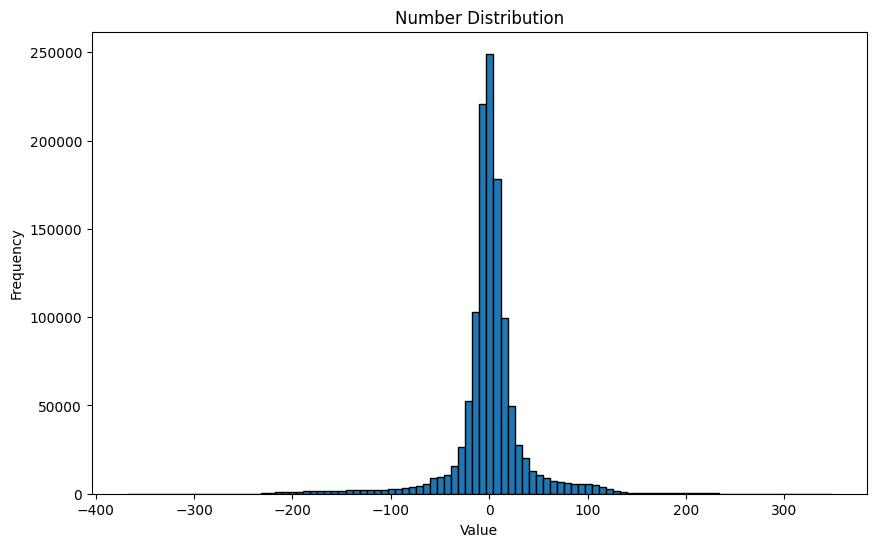

In [14]:
def matrix_values_distribution(data:np.ndarray, bins=20):
    # 使用較少的bin數計算數字值的直方圖
    hist, bin_edges = np.histogram(data, bins=bins) 

    # 打印直方圖數據
    print("Histogram values:", hist)
    print("Bin edges:", bin_edges)

    # 使用 matplotlib 顯示數字值分布的直方圖
    plt.figure(figsize=(10, 6))
    plt.hist(data.ravel(), bins=bins, edgecolor='black')  # 使用ravel將數據展平成一維
    plt.title('Number Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()
    
    
matrix_values_distribution(data = laplacian, bins=100)

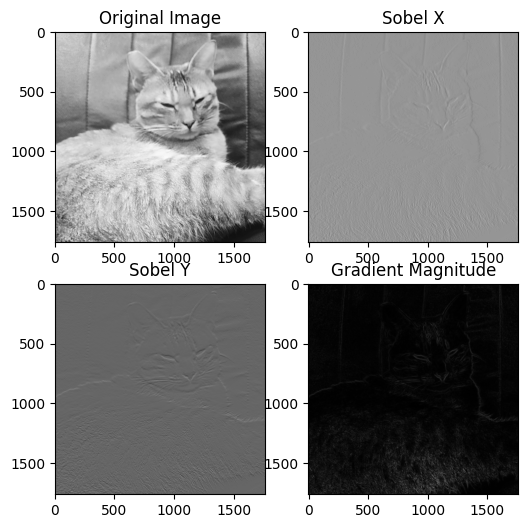

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 計算水平和垂直方向的Sobel梯度
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) # 水平方向梯度
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) # 垂直方向梯度

# 計算梯度的幅值
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# 計算梯度的方向
gradient_direction = np.arctan2(sobely, sobelx)

# 顯示結果
plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Sobel X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Sobel Y')
plt.imshow(sobely, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


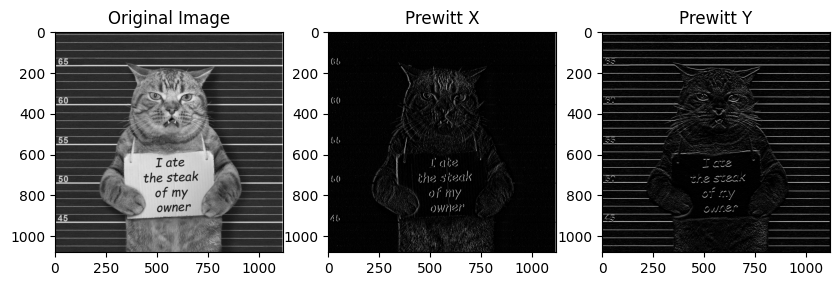

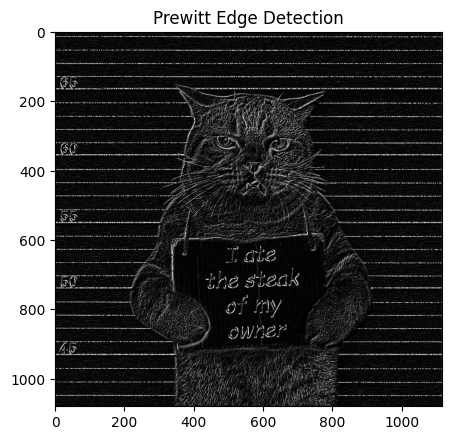

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 定義Prewitt運算子的卷積核
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\cat.jpg', cv2.IMREAD_GRAYSCALE)

# 應用Prewitt運算子
prewitt_x = cv2.filter2D(image, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, -1, prewitt_kernel_y)

# 合成最終的Prewitt邊緣檢測結果
prewitt = (prewitt_x+prewitt_y)/2

# 顯示原圖和Prewitt邊緣檢測結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Prewitt X')
plt.imshow(prewitt_x, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Prewitt Y')
plt.imshow(prewitt_y, cmap='gray')

plt.figure(figsize=(5, 5))
plt.title('Prewitt Edge Detection')
plt.imshow(prewitt, cmap='gray')

plt.show()


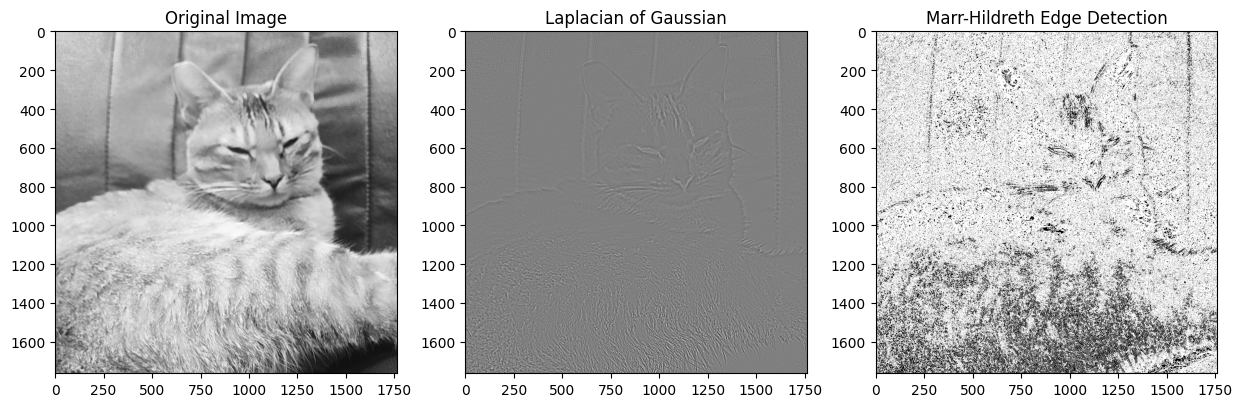

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def marr_hildreth_edge_detection(image, sigma):
    # Step 1: Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    
    # Step 2: Apply Laplacian
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    
    # Step 3: Detect zero crossings
    zero_crossing = np.zeros_like(laplacian)
    zero_crossing[np.where(np.diff(np.sign(laplacian), axis=0) != 0)] = 255
    zero_crossing[np.where(np.diff(np.sign(laplacian), axis=1) != 0)] = 255

    return laplacian, zero_crossing

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 應用 Marr-Hildreth 邊緣檢測
sigma = 2  # Gaussian kernel standard deviation
laplacian, edges = marr_hildreth_edge_detection(image, sigma)

# 顯示原圖、拉普拉斯圖像和邊緣檢測結果
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Laplacian of Gaussian')
plt.imshow(laplacian, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Marr-Hildreth Edge Detection')
plt.imshow(edges, cmap='gray')

plt.show()


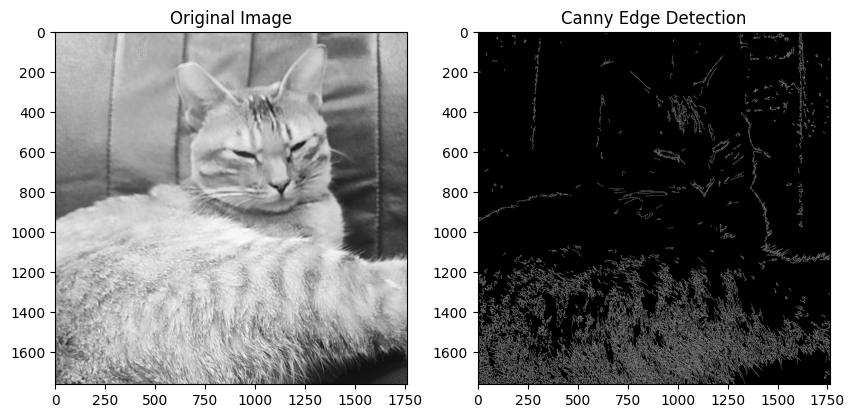

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 應用 Canny 邊緣檢測
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(image, low_threshold, high_threshold)

# 顯示原圖和 Canny 邊緣檢測結果
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')

plt.show()


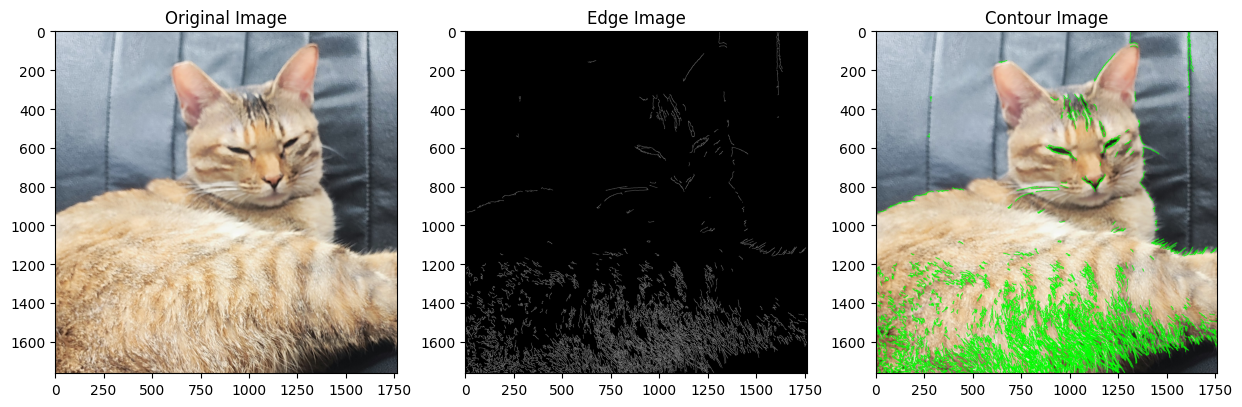

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 應用高斯模糊進行平滑
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用 Canny 邊緣檢測
edges = cv2.Canny(blurred, 50, 150)

# 查找輪廓
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 在原始圖像上繪制輪廓
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# 顯示原始圖像、邊緣圖像和輪廓圖像
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edge Image')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Contour Image')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

plt.show()


蛇行法（Snake Algorithm），也稱為主動輪廓模型（Active Contour Model），是一種基於輪廓追蹤的圖像分割方法。該算法通過迭代優化一個能量函數來調整輪廓，使其適應目標物體的邊界。蛇行法可以很好地應用於邊緣檢測和圖像分割。

蛇行法的基本思想是通過內部能量和外部能量的結合來驅動輪廓點的移動。內部能量控制輪廓的平滑性，外部能量則驅動輪廓向圖像的邊緣靠近。

### 內部能量
內部能量包括彈性能量和彎曲能量：
- 彈性能量：鼓勵輪廓點之間保持固定的距離，使輪廓不會過於拉伸。
- 彎曲能量：鼓勵輪廓保持平滑，避免過於彎曲。

### 外部能量
外部能量通常基於圖像的梯度，將輪廓點吸引到圖像的邊緣。

### 代碼示例

在 Python 中，我們可以使用 `scikit-image` 庫來實現蛇行法。以下是應用蛇行法進行圖像分割的示例代碼：


### 函數解釋

- `data.astronaut()`：加載一個示例圖像。你可以替換為其他圖像讀取方法，如 `image = cv2.imread('path_to_image', cv2.IMREAD_GRAYSCALE)`。
- `gaussian(image_gray, 3)`：對圖像進行高斯平滑處理，以減少噪聲。
- `active_contour`：應用蛇行法進行輪廓優化。主要參數包括：
  - `alpha`：內部能量中的彈性項係數，控制輪廓的彈性。
  - `beta`：內部能量中的彎曲項係數，控制輪廓的平滑性。
  - `gamma`：步長參數，控制優化過程的步長。

這段代碼展示了如何使用蛇行法來分割圖像中的物體。初始輪廓可以根據具體應用進行調整，內部和外部能量的權重參數也可以根據具體情況進行調整，以達到最佳的分割效果。

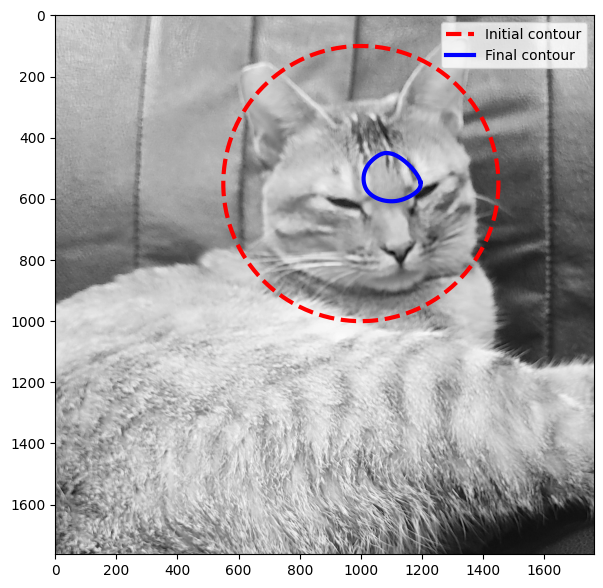

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# 讀取並預處理圖像
image = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)
# image = img_as_float(data.astronaut())
# image_gray = image[:, :, 0]
image_gray = image[:, :]

# 初始化蛇的初始輪廓
s = np.linspace(0, 2 * np.pi, 400)
x = 1000 + 450 * np.cos(s)
y = 550 + 450 * np.sin(s)
init_snake = np.array([x, y]).T

# 應用蛇行法
snake = active_contour(gaussian(image_gray, 3), init_snake, alpha=0.015, beta=10, gamma=0.001)

# 繪制結果
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image_gray, cmap=plt.cm.gray)
ax.plot(init_snake[:, 0], init_snake[:, 1], '--r', lw=3, label='Initial contour')
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3, label='Final contour')
# ax.set_xticks([]), ax.set_yticks([])
ax.legend()

plt.show()